In [9]:
import msmexplorer as msme
import numpy as np
%pylab inline
import seaborn as sns 
sns.set_style("whitegrid")
sns.set_context("poster",1.3)
from msmbuilder.utils import load

Populating the interactive namespace from numpy and matplotlib


/Users/muneeb/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'load']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# In this notebook, we simply compare the results of running metadynamics along traditional phi or psi dihedrals vs using supervised machine learning

In [2]:
import mdtraj as md
from msmbuilder.featurizer import DihedralFeaturizer

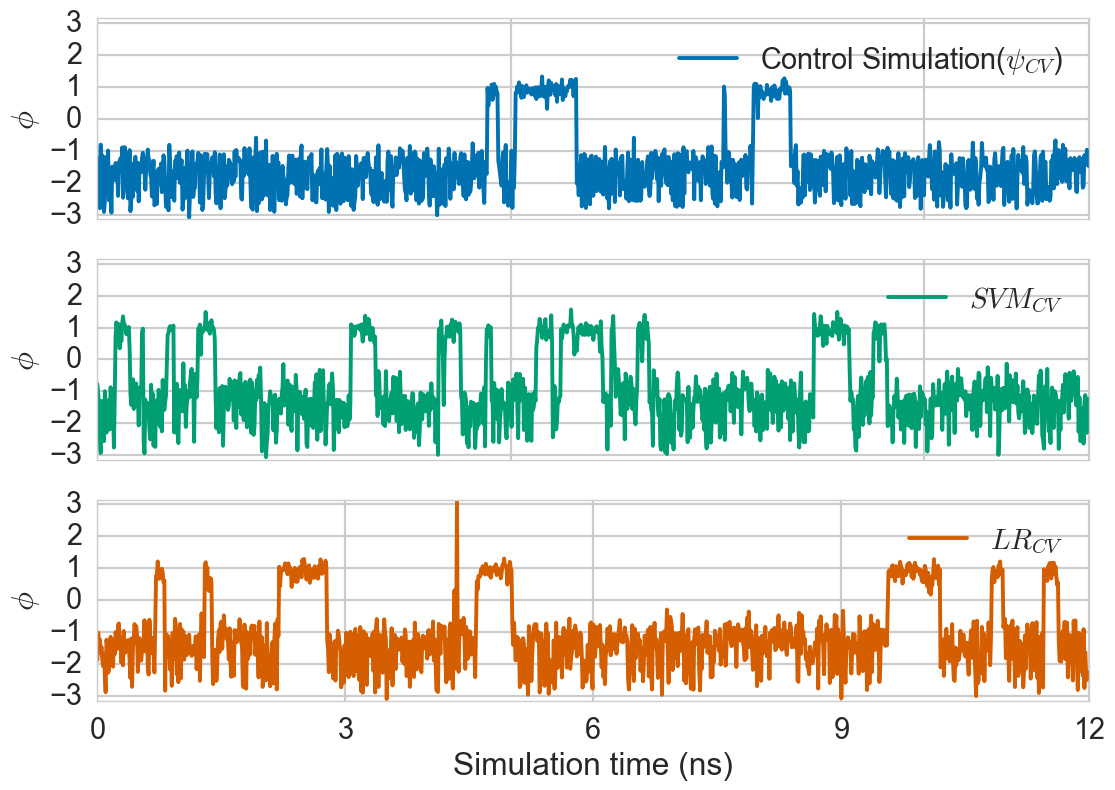

In [3]:
title_list = ["Control Simulation("+r'$\psi_{CV}$)',r'$SVM_{CV}$',r'$LR_{CV}$']

for i,f in enumerate(["control_meta_traj_1","svm_meta_traj","lr_meta_traj"]):
    subplot(3,1,i+1)
    test_traj = md.load("%s//reweight//trajectory.dcd"%f,top="./0.pdb")
    plot_test_feat = DihedralFeaturizer(sincos=False).transform([test_traj])[0]
    plot(plot_test_feat[:1200,0],label=title_list[i],c=sns.color_palette("colorblind")[i])

    if i==2:
        xticks([0,300,600,900,1200],[0,3,6,9,12])
        xlabel("Simulation time (ns)")
    else:
        xticks([0,500,1000,1200],[])
    ylim([-pi,pi])
    ylabel(r'$\phi$')
    legend()

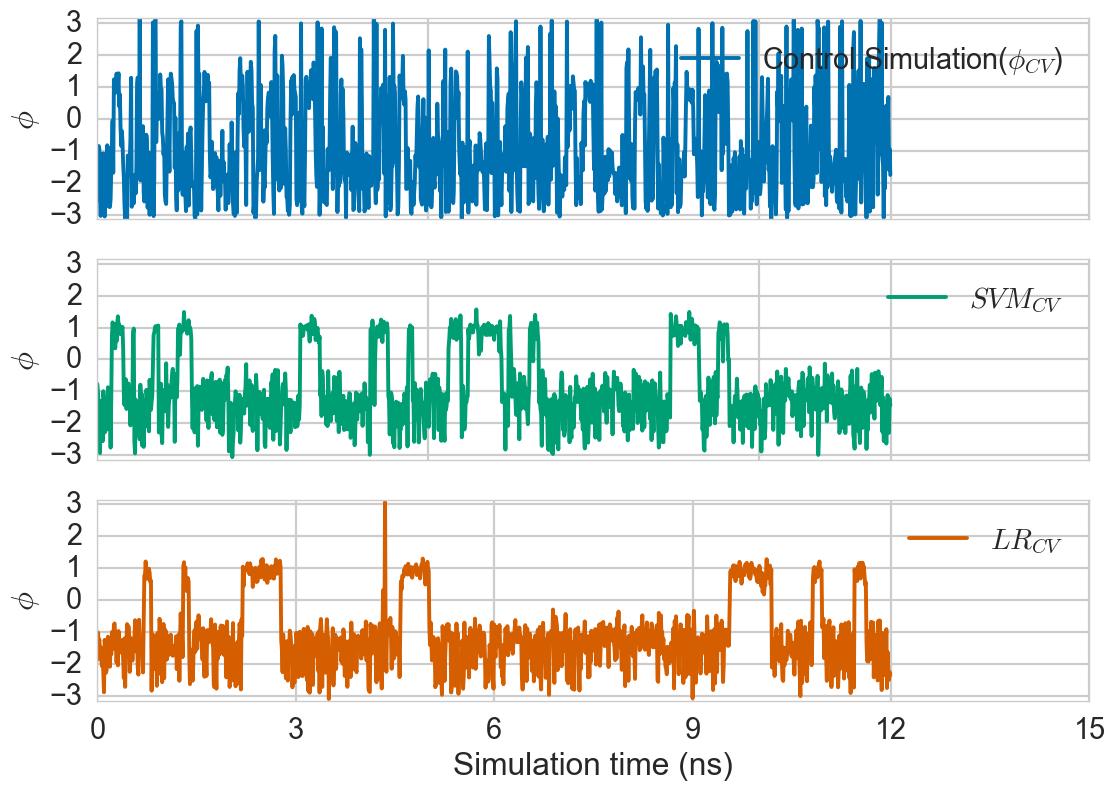

In [6]:
title_list = ["Control Simulation("+r'$\phi_{CV}$)',r'$SVM_{CV}$',r'$LR_{CV}$']

for i,f in enumerate(["control_meta_traj_2","svm_meta_traj","lr_meta_traj"]):
    subplot(3,1,i+1)
    test_traj = md.load("%s//reweight//trajectory.dcd"%f,top="./0.pdb")
    plot_test_feat = DihedralFeaturizer(sincos=False).transform([test_traj])[0]
    plot(plot_test_feat[:1200,0],label=title_list[i],c=sns.color_palette("colorblind")[i])

    if i==2:
        xticks([0,300,600,900,1200,1500],[0,3,6,9,12,15])
        xlabel("Simulation time (ns)")
    else:
        xticks([0,500,1000,1200,1500],[])
    ylim([-pi,pi])
    ylabel(r'$\phi$')
    legend()

## Notes: Our automatic SML based CV are often more efficient that randomly picking but if we pick the right CV based off expert knowledge than it is likely that the SML based model might perform poorly. However, this intuition likely fails in higher dimensions so we believe SML based CVs will perform better there. 